# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Please refer to the attached report for a full explanation of the processing pipeline below
## Use the notebook only for code checking and commenting.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np
import seaborn as sns

training_file =  "data/train.p"
validation_file = "data/valid.p"
testing_file = "data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

n_train = X_train.shape[0]

n_validation = X_valid.shape[0]

n_test = X_test.shape[0]

image_shape = X_test[0,:,:,:].shape

n_classes = np.unique(y_train).shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

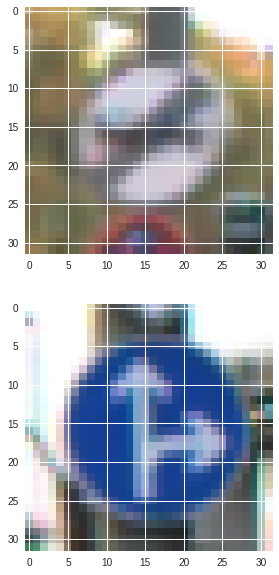

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

plt.figure(1, figsize=(20,10))
plt.subplot(211)
plt.imshow(X_train[100])
plt.subplot(212)
plt.imshow(X_train[1040])
plt.show()

#Here some examples of traffic signs. As we can see they are quite in low resolution. Despite it we can build a deep
#learning model that will be able to accurately recognisee them.

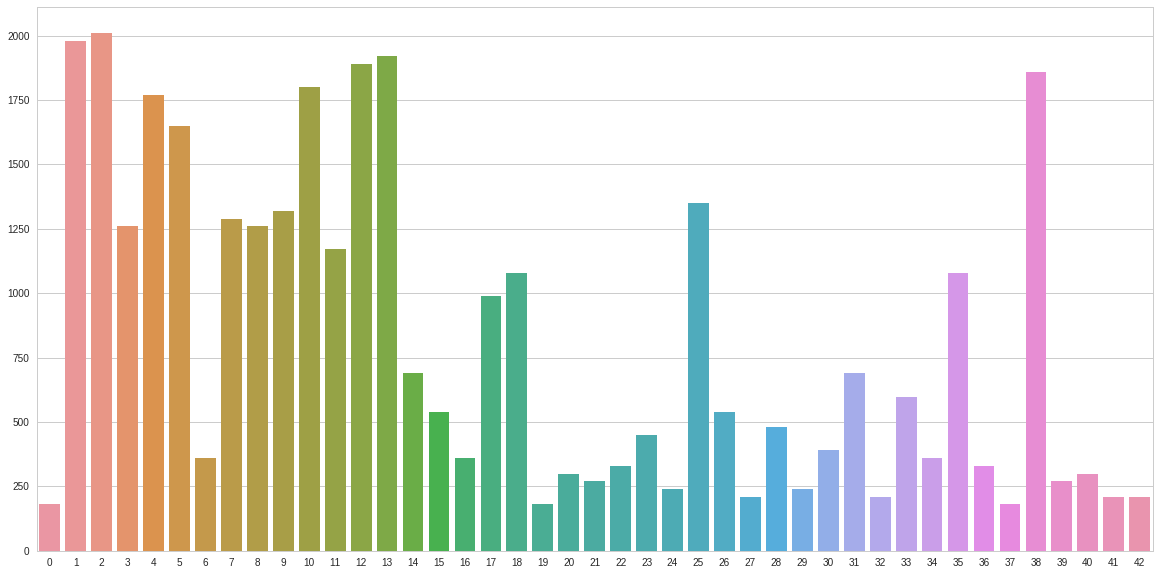

In [4]:
# Here we count how many instances for each classes are present in the training set
counts = [len(y_train[y_train == i]) for i in range(n_classes)] 
labels = np.arange(n_classes)
sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
ax = sns.barplot(y=counts, x=labels)

# The plot below shows how unbalanced the dataset is. Some traffic signs are barely represented.
# It will be important that through data augmentation we also take care of this issue.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [5]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import cv2

def to_greyscale(data, contrast_normalization=False):
    """
    This function applies greyscale transformation and calls global contrast normalization on 
    each image if the parameter contrast_normalization is set to True
    """
    data_transformed = []
    for i in range(data.shape[0]):
        image = cv2.cvtColor(data[i], cv2.COLOR_RGB2GRAY)
        if contrast_normalization:
            image = GCN(image)
        data_transformed.append(image)
    return np.array(data_transformed).reshape(data.shape[:-1] + (1,)).astype(np.float32)

def GCN(image):
    """
    It applies global contrast normalization on the input image.
    """
    mean = np.mean(image)
    std = np.std(image, ddof=1)
    return (image-mean)/std

#Here we transform the data sets according to greyscale and GCN preprocessing
X_train = to_greyscale(X_train, contrast_normalization=True)
X_valid = to_greyscale(X_valid, contrast_normalization=True)
X_test = to_greyscale(X_test, contrast_normalization=True)

In [6]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split


def apply_rescale(image, max_scale_factor = 0.05):    
    """
    Rescales the image around the center. The scaling factor is chosen randomly.
    :param image: The image to rescale
    :param max_scale_factor: The maximum value of the rescaling factor allowed
    :return: The rescaled image
    """
    s_x = 1.0 + np.random.uniform(-max_scale_factor, max_scale_factor)
    s_y = 1.0 + np.random.uniform(-max_scale_factor, max_scale_factor)
    
    M = np.array([[s_x, 0.0, 0.0], [0.0, s_y, 0.0]], dtype = np.float32)
    rows, cols, ch = image.shape
    return cv2.warpAffine(image, M, (cols, rows))

def apply_rotation(image, max_angle = 10):
    """
    Apply a rotation around the center to  the input image. Used for data augmentation
    :param image: The image to rotate
    :param angle: The angle of rotation.
    :return: The rotated image 
    """
    rows, cols = image.shape[:-1]
    angle = np.random.uniform(-max_angle, max_angle)
    M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
    return cv2.warpAffine(image, M, (cols, rows))

def apply_translation(image, max_pixel_shift = 3):
    """
    Applies a translation to the image either along the x or y axis.
    :param image: The image to translate
    :param max_pixel_shift: The maximum absolute value of pixel shift-
    :return: The translated image 
    """
    rows, cols = image.shape[:-1]
    shift = np.random.randint(-max_pixel_shift, max_pixel_shift)
    if np.random.randint(0, 1) == 0:
        M = np.float32([[1, 0, shift], [0, 1, 0]])
    else:
        M = np.float32([[1, 0, 0], [0, 1, shift]])
    return cv2.warpAffine(image, M, (cols, rows))

def apply_transformation(image):
    """
    Applies randomly one of the three affine transformations to the input.
    """
    t = np.random.randint(0, 2)
    if t == 0:
        return apply_translation(image)    
    elif t == 1:
        return apply_rotation(image)    
    else:
        return apply_rescale(image)

def data_augmentation(X, y, max_instances=10000, seed=0):
    """
    This function is used to augment the datasets. It generates max_instances for each class by applying
    rotations, translations or rescaling to the images. The random generator seed can be also set.
    """
    np.random.seed(seed)
    X_augmented = []
    y_augmented = []
    for i in range(n_classes):
        n_samples = len(y[y==i])
        X_sub = X[y==i]
        if n_samples > max_instances:
            for i in range(max_instances):
                X_augmented.append(X_sub[i])
                y_augmented.append(i)
        else:
            k = 0
            while k < max_instances:
                image = X_sub[k % n_samples]
                X_augmented.append(apply_transformation(image))
                y_augmented.append(i)
                k += 1
                
    return np.array(X_augmented), np.array(y_augmented)

#Data augmentation is only applied to the training set
X_train, y_train = data_augmentation(X_train, y_train)
X_train = X_train.reshape(X_train.shape + (1,) )

#Here we apply one-hot encoding to the labels for training, validation and test set
label_binarizer = LabelBinarizer()
label_binarizer.fit(range(max(y_train)+1))
y_train = label_binarizer.transform(y_train)
y_valid = label_binarizer.transform(y_valid)
y_test = label_binarizer.transform(y_test)
X_train, _, y_train, _ = train_test_split(X_train, y_train, test_size=0.00001, random_state=42)

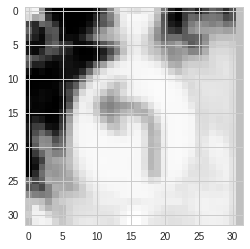

In [59]:
plt.imshow(X_train[1000,:,:,0])
plt.savefig("data/report_images/augmented1.jpg")

plt.imshow(X_train[100000,:,:,0])
plt.savefig("data/report_images/augmented2.jpg")

plt.imshow(X_train[400000,:,:,0])
plt.savefig("data/report_images/augmented3.jpg")


### Model Architecture

#### Parameters: Here we define all the parameters and hyperparameters of the Convolutional Neural Network

In [7]:
# Input dimension of the images
img_rows, img_cols, nb_channels = (32, 32, 1)

# Number of classes in the dataset
nb_classes = 43

# Network structure
structure = [{"type": "conv", "params": {"patch_x": 5, "patch_y": 5, "depth": 16, "channels": 1, "stride" : 1}},
             {"type": "pool", "params": {"side": 2, "stride": 2, "pad": "SAME"}},
             {"type": "conv", "params": {"patch_x": 5, "patch_y": 5, "depth": 32, "channels": 16, "stride" : 1}},
             {"type": "pool", "params": {"side": 2, "stride": 2, "pad": "SAME"}},
             {"type": "conv", "params": {"patch_x": 5, "patch_y": 5, "depth": 64, "channels": 32, "stride" : 1}},
             {"type": "pool", "params": {"side": 2, "stride": 2, "pad": "SAME"}},
             {"type": "dense", "params": {"n_input": 1024, "n_output": 512}}]

dropout = 0.5

# Initializer variable parameters
std_variables = 0.1
constant_bias = 0.1

# Training
optim = {"type" : "Adam"}
batch_size = 128

#### Utility Functions

In [8]:
import tensorflow as tf

def weight_variable(shape, std=0.1, name=None):
    """
    Initializes variables according to a normal distribution with zero mean and standard
    deviation stddev.
    
    :param shape: Provides the shape of the container of the variables
    :param std: Defines the standard deviation of the normal distribution
    """
    initial = tf.truncated_normal(shape, stddev=std, name=name)
    return tf.Variable(initial)

def bias_variable(shape, value=0.1, name=None):
    """
    Initialiezes variables all equal to a constant.
    
    :param shape: Provides the shape of the container of the variables
    :param value: Defines the value of the constant to which all the variables are initialized.
    """
    initial = tf.constant(value, shape=shape, name=name)
    return tf.Variable(initial)


#### Placeholders

In [9]:
# These placeholders are used to feed tf variables when needed. The first hold a batch of input
# images, the second holds a batch of one-hot encoded labels
x_holder = tf.placeholder(tf.float32, shape=[None, img_rows, img_cols, nb_channels], name="x")
y_holder = tf.placeholder(tf.float32, shape=[None, nb_classes], name="labels")

#### Variables

In [10]:
def conv_layer(X, w, b, params ,local_response=True):
    """
    Passes the input X through a convolutional layer given weights w, bias b and hyperparameters params. It can also
    perform a local response normalization if set to True. Returns the operation output
    """
    conv = tf.nn.conv2d(X, w, strides=[1, params["stride"], params["stride"], 1], padding='SAME') + b
    if local_response:
        return tf.nn.local_response_normalization(tf.nn.relu(conv))
    else:
        return tf.nn.relu(conv)

def dense_layer(X, w, b, params, dropout=None):
    """
    Passes the input X through a fully connected layer with relu given weights w, bias b and hyperparameters params.
    Returns the operation output
    """
    shape = X.get_shape()
    return tf.nn.relu(tf.matmul(X, w) + b)

def pool_layer(X, params):
    """
    Passes the input X through a max pool layer given weights w, bias b and hyperparameters params.
    Returns the operation output
    """
    return tf.nn.max_pool(X, ksize=[1, params["side"], params["side"], 1],
                          strides=[1, params["stride"], params["stride"], 1],
                          padding='SAME')

In [11]:
#Here all the relevant variables, weights and biases for all layers, are defined. I also
#employ syntax used in the tensorboard API for debugging purposes

with tf.name_scope("conv1"):
    params = structure[0]["params"]
    W_conv_1 = weight_variable([params["patch_x"], params["patch_y"], params["channels"], params["depth"]], name="W")
    b_conv_1 = bias_variable([params["depth"]], name="b")
    tf.summary.histogram("weights", W_conv_1)
    tf.summary.histogram("biases", b_conv_1)

with tf.name_scope("conv2"):
    params = structure[2]["params"]
    W_conv_2 = weight_variable([params["patch_x"], params["patch_y"], params["channels"], params["depth"]], name="W")
    b_conv_2 = bias_variable([params["depth"]], name="b")
    tf.summary.histogram("weights", W_conv_2)
    tf.summary.histogram("biases", b_conv_2)
    
with tf.name_scope("conv3"):
    params = structure[4]["params"]
    W_conv_3 = weight_variable([params["patch_x"], params["patch_y"], params["channels"], params["depth"]], name="W")
    b_conv_3 = bias_variable([params["depth"]], name="b")
    tf.summary.histogram("weights", W_conv_3)
    tf.summary.histogram("biases", b_conv_3)

with tf.name_scope("dense1"):
    params = structure[6]["params"]
    W_dense_1 = weight_variable([params["n_input"], params["n_output"]], name="W")
    b_dense_1 = bias_variable([params["n_output"]], name="b")
    tf.summary.histogram("weights", W_dense_1)
    tf.summary.histogram("biases", b_dense_1)
    
with tf.name_scope("final_layer"):
    W_final = weight_variable([structure[6]["params"]["n_output"], nb_classes], name="W")
    b_final = bias_variable([nb_classes], name="b")

#### Model

In [12]:
# Here we define the full feedforward model. Dropout is also inserted.

def _model(X_image, dropout=1.0):
    """
    It feed forwards the input X_image into the full network structure.
    There are 3 convolution+relu+Maxpool layers, then a flattening
    layer, a fully connected layer, a dropout layer and outputs the logits.
    """
    data = X_image
    conv1 = conv_layer(data, W_conv_1, b_conv_1, structure[0]["params"])
    pool1 = pool_layer(conv1, structure[1]["params"])
    conv2 = conv_layer(pool1, W_conv_2, b_conv_2, structure[2]["params"])
    pool2 = pool_layer(conv2, structure[3]["params"])
    conv3 = conv_layer(pool2, W_conv_3, b_conv_3, structure[4]["params"])
    pool3 = pool_layer(conv3, structure[5]["params"])
    
    shape = pool3.get_shape()
    reshaped = tf.reshape(pool3, [-1, int(shape[1]*shape[2]*shape[3])])
    dense1 = dense_layer(reshaped, W_dense_1, b_dense_1, structure[6]["params"])
    dropped = tf.nn.dropout(dense1, dropout)
    return tf.matmul(dropped, W_final) + b_final
    
    

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

### Training

#### Helper functions

In [14]:
def _optimizer_type(optimizer, loss):
    """
    Chooses the optimizer.
    """
    if optimizer["type"] == "Adagrad":
        learning_rate = tf.train.exponential_decay(0.05, tf.Variable(0), 10000, 0.95)
        return tf.train.AdagradOptimizer(learning_rate).minimize(loss, global_step=tf.Variable(0))
    elif optimizer["type"] == "Adam":
        return tf.train.AdamOptimizer(0.001).minimize(loss)

def next_batch(X, y, length, batch_init):
    """
    Utility function to feed new batches for the training phase
    """
    if (batch_init + 1) * length <= len(y):
        init = batch_init * length
        fin = (batch_init + 1) * length
        batch_init += 1
        return X[init: fin], y[init: fin], batch_init
    else:
        init = batch_init * length
        batch_init = 0
        return X[init:], y[init:], batch_init

def prepare_dict(batch):
    """
    Helper function for feeding the a dictionary into the placeholders.
    """
    return {x_holder: batch[0].reshape(-1, img_rows, img_cols, nb_channels),
            y_holder : batch[1]}

def _accuracy(predictions, actual):
    """
    The accuracy function
    """
    return 100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(actual, 1))/predictions.shape[0]

#### Training related definitions

In [15]:
#Here we define the cost function, the optimizer and the prediction container which is used to
#evaluate the prediction given an input.

with tf.name_scope('cross_entropy'):
    logits = _model(x_holder, dropout)
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y_holder))
    tf.summary.scalar('cross_entropy', loss)

with tf.name_scope("train"):
    optimizer = _optimizer_type(optim, loss)
    
prediction = tf.nn.softmax(_model(x_holder, 1.0))


#### Training session

In [16]:
#Here the training session is performed. The trained model is also saved for future reference.

import os

nb_epochs = 10
logging_info = 500

with tf.Session() as sess:
    train_writer = tf.summary.FileWriter("./logs/model_adam_local_response_10epoches_one_fc", sess.graph)
    merged = tf.summary.merge_all()
    tf.initialize_all_variables().run()

    batch_epochs = int(X_train.shape[0]/batch_size)*nb_epochs
    batch_init = 0

    for step in range(batch_epochs):
        batch = next_batch(X_train, y_train, batch_size, batch_init)
        batch_init = batch[2]
        _ = sess.run(optimizer, feed_dict=prepare_dict(batch))
        if step % logging_info == 0:
            l, results, summary = sess.run([loss, prediction, merged], feed_dict=prepare_dict(batch))
            train_writer.add_summary(summary, step)
            
            print("Minibatch loss value at step {}: {:.2f}".format(step+1, l))
            minibatch_accuracy = _accuracy(results, batch[1])
            print("Minibatch accuracy: {:.1f}%".format(minibatch_accuracy))
            valid_results = sess.run(prediction, feed_dict={x_holder : X_valid})
            valid_accuracy = _accuracy(valid_results, y_valid)
            print("Validation set accuracy: {:.1f}%".format(valid_accuracy))
    saver = tf.train.Saver()
    save_path = os.path.join("models/", 'model_adam_local_response_20epoches_one_fc.ckpt')
    saver.save(sess, save_path);

        
        

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Minibatch loss value at step 1: 4.50
Minibatch accuracy: 7.8%
Validation set accuracy: 1.4%
Minibatch loss value at step 501: 0.41
Minibatch accuracy: 94.5%
Validation set accuracy: 88.6%
Minibatch loss value at step 1001: 0.17
Minibatch accuracy: 97.7%
Validation set accuracy: 94.3%
Minibatch loss value at step 1501: 0.05
Minibatch accuracy: 100.0%
Validation set accuracy: 95.9%
Minibatch loss value at step 2001: 0.10
Minibatch accuracy: 98.4%
Validation set accuracy: 95.6%
Minibatch loss value at step 2501: 0.01
Minibatch accuracy: 100.0%
Validation set accuracy: 96.4%
Minibatch loss value at step 3001: 0.02
Minibatch accuracy: 100.0%
Validation set accuracy: 97.0%
Minibatch loss value at step 3501: 0.03
Minibatch accuracy: 100.0%
Validation set accuracy: 95.9%
Minibatch loss value at step 4001: 0.00
Minibatch accuracy: 100.0%
Validation set accuracy: 97.0%
Minibatch loss value at step 4501: 0.02
Minibatch accu

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load saved model

In [17]:
#I load the saved model to evaluate accuracy on the validation and test set.
with tf.Session() as sess:
    saver = tf.train.Saver()
    saver.restore(sess, os.path.join("models/", 'model_adam_local_response_20epoches_one_fc.ckpt'))
    test_res = sess.run(prediction, feed_dict={x_holder : X_test})
    valid_res = sess.run(prediction, feed_dict={x_holder : X_valid})
    valid_accuracy = _accuracy(valid_res, y_valid)
    test_accuracy = _accuracy(test_res, y_test)
    print("Validation set accuracy: {:.1f}% and Test set accuracy : {:.1f}%".format(valid_accuracy, test_accuracy))

Validation set accuracy: 97.4% and Test set accuracy : 95.3%


### Load and Output the Images

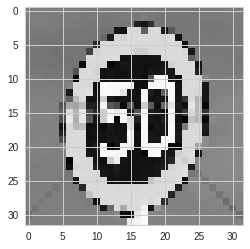

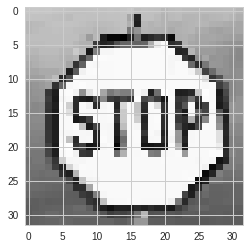

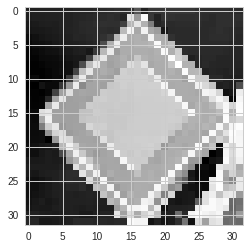

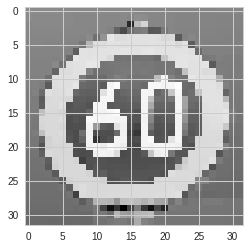

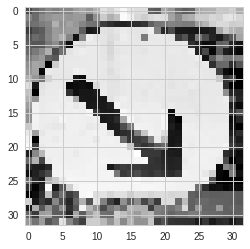

In [18]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

#Here I load the 5 images and preprocess them before inputing into the network

import matplotlib.image as mpimg

img1 = mpimg.imread('./data/sign1.jpg')
img1 = img1[40:310,50:400]
img1 = cv2.resize(img1,(32,32), interpolation = cv2.INTER_CUBIC)
img1 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
img1 = GCN(img1)
plt.imshow(img1);
plt.savefig("./data/processed1.jpg")
plt.show()

img2 = mpimg.imread('./data/sign2.jpg')
img2 = img2[25:150,60:190]
img2 = cv2.resize(img2,(32,32), interpolation = cv2.INTER_CUBIC)
img2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
img2 = GCN(img2)
plt.imshow(img2);
plt.savefig("./data/processed2.jpg")
plt.show()

img3 = mpimg.imread('./data/sign3.jpg')
img3 = img3[:180,30:230]
img3 = cv2.resize(img3,(32,32), interpolation = cv2.INTER_CUBIC)
img3 = cv2.cvtColor(img3, cv2.COLOR_RGB2GRAY)
img3 = GCN(img3)
plt.imshow(img3);
plt.savefig("./data/processed3.jpg")
plt.show()

img4 = mpimg.imread('./data/sign4.jpg')
img4 = img4[:185,:]
img4 = cv2.resize(img4,(32,32), interpolation = cv2.INTER_CUBIC)
img4 = cv2.cvtColor(img4, cv2.COLOR_RGB2GRAY)
img4 = GCN(img4)
plt.imshow(img4);
plt.savefig("./data/processed4.jpg")
plt.show()

img5 = mpimg.imread('./data/sign5.jpg')
img5 = img5[:190,:]
img5 = cv2.resize(img5,(32,32), interpolation = cv2.INTER_CUBIC)
img5 = cv2.cvtColor(img5, cv2.COLOR_RGB2GRAY)
img5 = GCN(img5)
plt.imshow(img5);
plt.savefig("./data/processed5.jpg")
plt.show()

#This is the array containing the 5 images in the form ready to be processed by the network
images = np.array([img1, img2, img3, img4, img5]).reshape((-1, 32, 32, 1))

### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

In [23]:
#Here I predict the classes for the 5 images
with tf.Session() as sess:
    saver = tf.train.Saver()
    saver.restore(sess, os.path.join("models/", "model_adam_local_response_20epoches_one_fc.ckpt"))
    image_res = sess.run(prediction, feed_dict={x_holder : images})

np.argmax(image_res[0]),np.argmax(image_res[1]),np.argmax(image_res[2]),np.argmax(image_res[3]),np.argmax(image_res[4])

(2, 14, 12, 3, 38)

### Analyze Performance

In [24]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

print ("Performance on 5 images: {:.1f}%".format(100))

#All images have been correctly classified

Performance on 5 images: 100.0%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

In [31]:
# Utility function for bar plots
def bar_plot_softmax(n, path, cutoff=5):
    ind = np.sort(np.argpartition(image_res[n], -cutoff)[-cutoff:])
    sns.set_style("whitegrid")
    plt.figure(figsize=(7,4))
    ax = sns.barplot(y=image_res[n][ind], x=ind)
    plt.savefig(path)
    plt.show()

#### First image

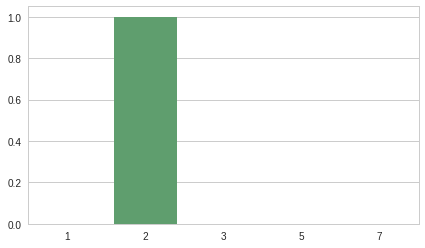

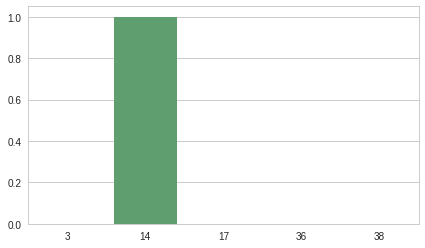

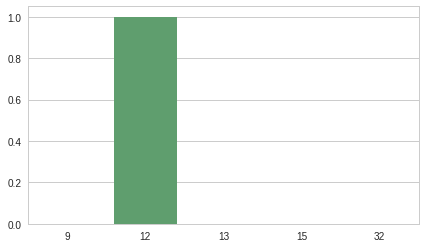

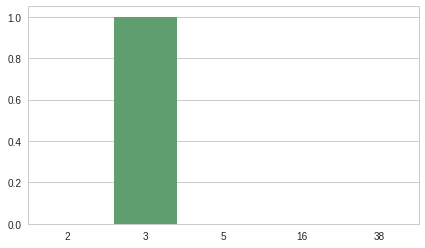

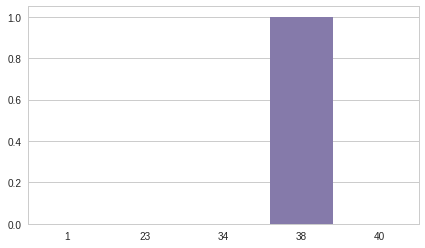

In [35]:
bar_plot_softmax(0, "data/softmax1.jpg")
bar_plot_softmax(1, "data/softmax2.jpg")
bar_plot_softmax(2, "data/softmax3.jpg")
bar_plot_softmax(3, "data/softmax4.jpg")
bar_plot_softmax(4, "data/softmax5.jpg")

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

## The writeup can be found in the attached pdf report#

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [36]:
def _conv_layer_1_output(X_image, pool=True):
    data = X_image
    conv1 = conv_layer(data, W_conv_1, b_conv_1, structure[0]["params"])
    if pool:
        return pool_layer(conv1, structure[1]["params"])
    else:
        return conv1

def _conv_layer_2_output(X_image, pool=True):
    data = X_image
    conv1 = conv_layer(data, W_conv_1, b_conv_1, structure[0]["params"])
    pool1 = pool_layer(conv1, structure[1]["params"])
    conv2 = conv_layer(pool1, W_conv_2, b_conv_2, structure[2]["params"])
    if pool:
        return pool_layer(conv2, structure[3]["params"])
    else:
        return conv2

def _conv_layer_3_output(X_image, pool=True):
    data = X_image
    conv1 = conv_layer(data, W_conv_1, b_conv_1, structure[0]["params"])
    pool1 = pool_layer(conv1, structure[1]["params"])
    conv2 = conv_layer(pool1, W_conv_2, b_conv_2, structure[2]["params"])
    pool2 = pool_layer(conv2, structure[3]["params"])
    conv3 = conv_layer(pool2, W_conv_3, b_conv_3, structure[4]["params"])
    if pool:
        return pool_layer(conv3, structure[5]["params"])
    else:
        return conv3 

In [38]:
with tf.Session() as sess:
    saver = tf.train.Saver()
    saver.restore(sess, os.path.join("models/",  "model_adam_local_response_20epoches_one_fc.ckpt"))
    first_feature_maps = _conv_layer_1_output(x_holder, False)
    second_feature_maps = _conv_layer_2_output(x_holder,False)
    third_feature_maps = _conv_layer_3_output(x_holder,False)
    first, second, third = sess.run([first_feature_maps, second_feature_maps, third_feature_maps],
                   feed_dict={x_holder: img1.reshape((1,32,32,1))})

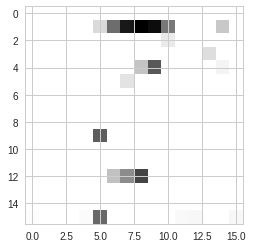

In [49]:
plt.imshow(second[0,:,:,5]);

In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")